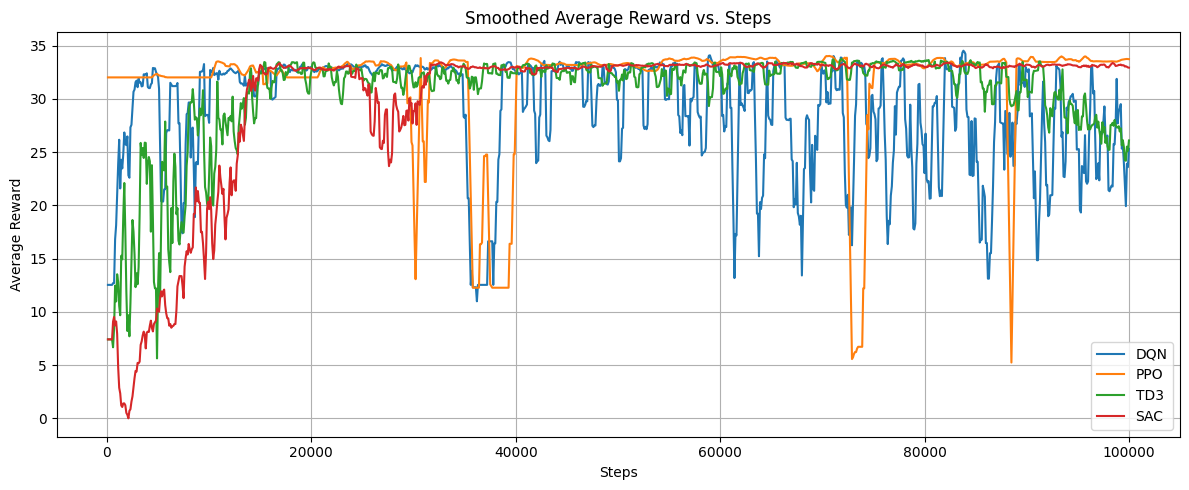

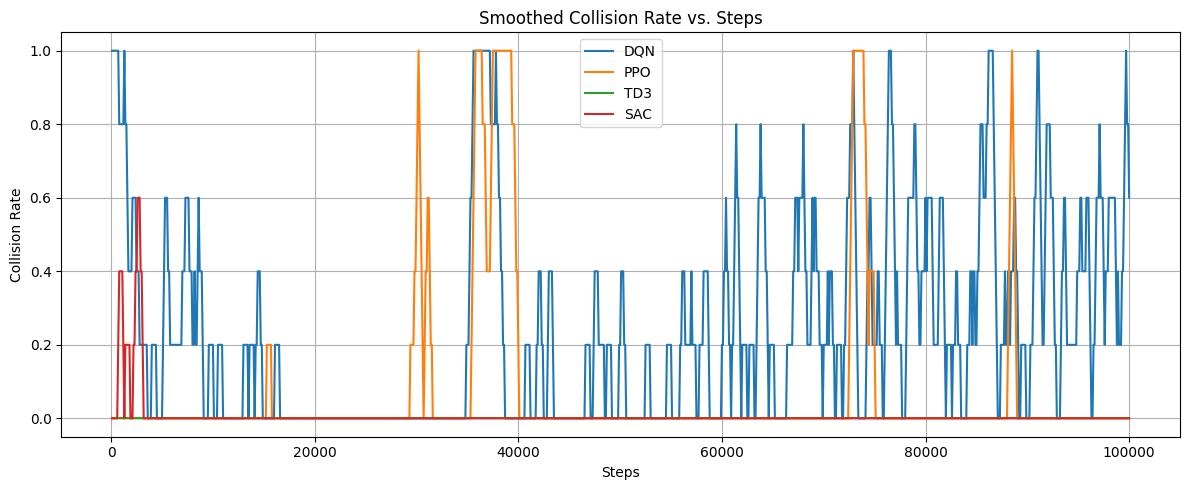

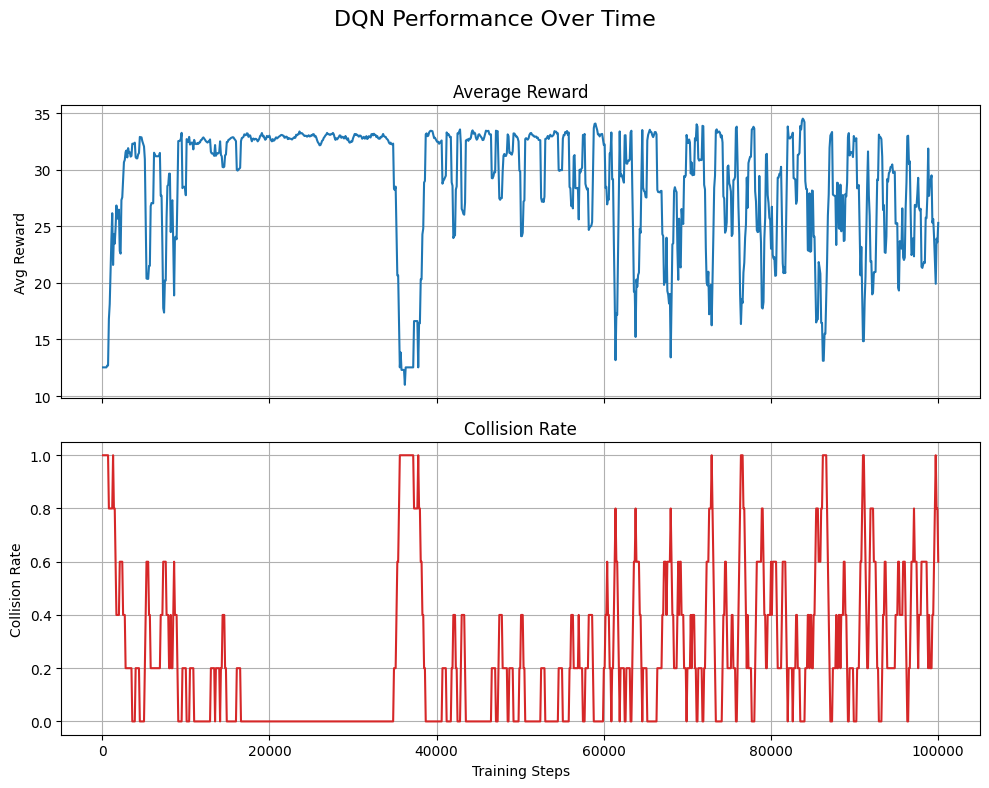

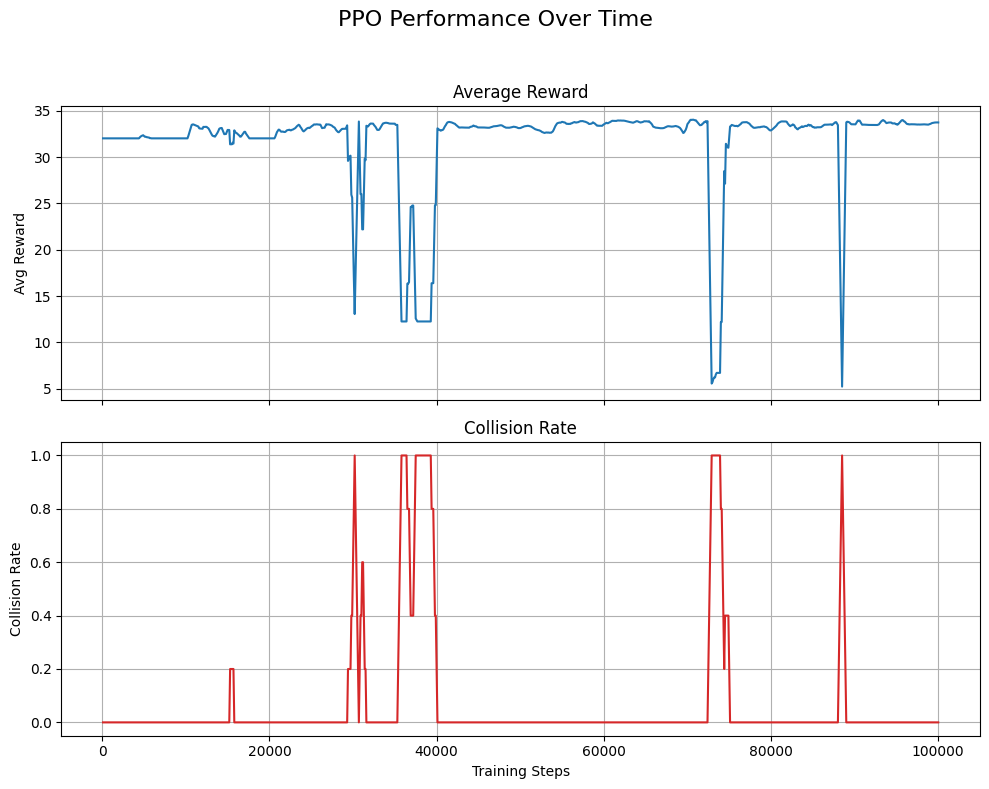

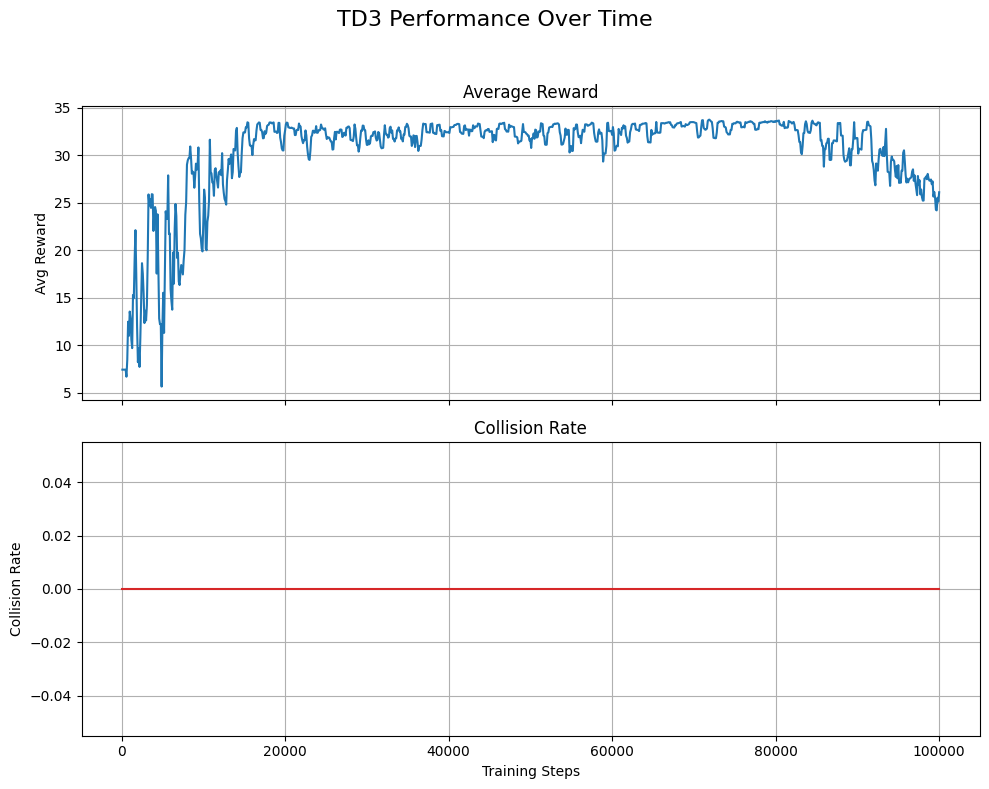

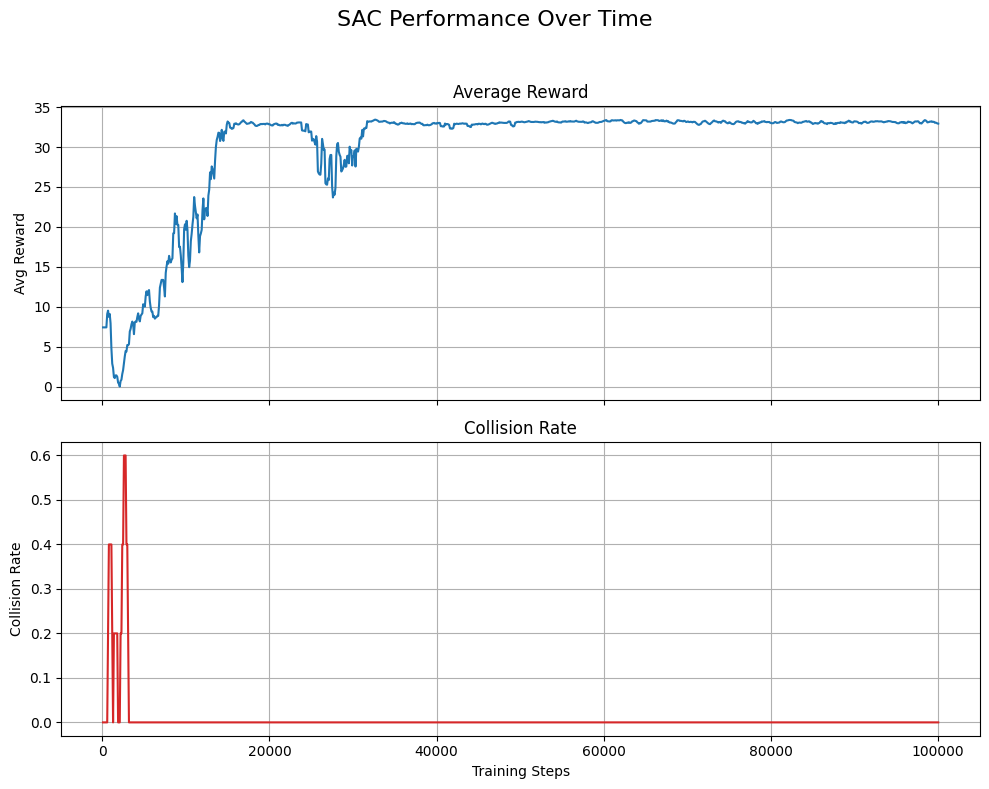

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load and tag agent data ===
dqn = pd.read_csv("DQN_MlpPolicy.csv")
ppo = pd.read_csv("PPO_MlpPolicy.csv")
td3 = pd.read_csv("TD3_MlpPolicy.csv")
sac = pd.read_csv("SAC_MlpPolicy.csv")

dqn["Agent"] = "DQN"
ppo["Agent"] = "PPO"
td3["Agent"] = "TD3"
sac["Agent"] = "SAC"

# === Combine into one DataFrame ===
df = pd.concat([dqn, ppo, td3, sac], ignore_index=True)

# === Function for rolling average smoothing ===
def smooth(series, window=5):
    return series.rolling(window=window, min_periods=1).mean()

# === Plot 1: Smoothed Average Reward (all agents together) ===
plt.figure(figsize=(12, 5))
for agent in df["Agent"].unique():
    agent_df = df[df["Agent"] == agent]
    plt.plot(agent_df["steps"], smooth(agent_df["avg_reward"]), label=agent)
plt.title("Smoothed Average Reward vs. Steps")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot 2: Smoothed Collision Rate (all agents together) ===
plt.figure(figsize=(12, 5))
for agent in df["Agent"].unique():
    agent_df = df[df["Agent"] == agent]
    plt.plot(agent_df["steps"], smooth(agent_df["collision_rate"]), label=agent)
plt.title("Smoothed Collision Rate vs. Steps")
plt.xlabel("Steps")
plt.ylabel("Collision Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Individual Agent Plots: Reward + Collision ===
agents = df["Agent"].unique()

for agent in agents:
    agent_df = df[df["Agent"] == agent]

    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    fig.suptitle(f"{agent} Performance Over Time", fontsize=16)

    # Subplot 1: Average Reward
    axs[0].plot(agent_df["steps"], smooth(agent_df["avg_reward"]), color='tab:blue')
    axs[0].set_title("Average Reward")
    axs[0].set_ylabel("Avg Reward")
    axs[0].grid(True)

    # Subplot 2: Collision Rate
    axs[1].plot(agent_df["steps"], smooth(agent_df["collision_rate"]), color='tab:red')
    axs[1].set_title("Collision Rate")
    axs[1].set_xlabel("Training Steps")
    axs[1].set_ylabel("Collision Rate")
    axs[1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
